In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset  (1).csv to Dataset  (1).csv


In [18]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [19]:
table_booking_pct = df['Has Table booking'].value_counts(normalize=True) * 100
online_delivery_pct = df['Has Online delivery'].value_counts(normalize=True) * 100

print("Table Booking (%):")
print(table_booking_pct)

print("\nOnline Delivery (%):")
print(online_delivery_pct)


Table Booking (%):
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Online Delivery (%):
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [20]:
df.groupby('Has Table booking')['Aggregate rating'].mean()


,Aggregate rating
Has Table booking,
No,2.559359
Yes,3.441969


In [21]:
df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True) * 100


Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: proportion, dtype: float64

LEVEL 2  --- Price Range Analysis

In [22]:
df['Price range'].value_counts()


,count
Price range,
1,4444
2,3113
3,1408
4,586


In [23]:
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean()
avg_rating_price


,Aggregate rating
Price range,
1,1.999887
2,2.941054
3,3.683381
4,3.817918


In [24]:
avg_rating_price = df.groupby('Price range')['Aggregate rating'].mean()
avg_rating_price


,Aggregate rating
Price range,
1,1.999887
2,2.941054
3,3.683381
4,3.817918


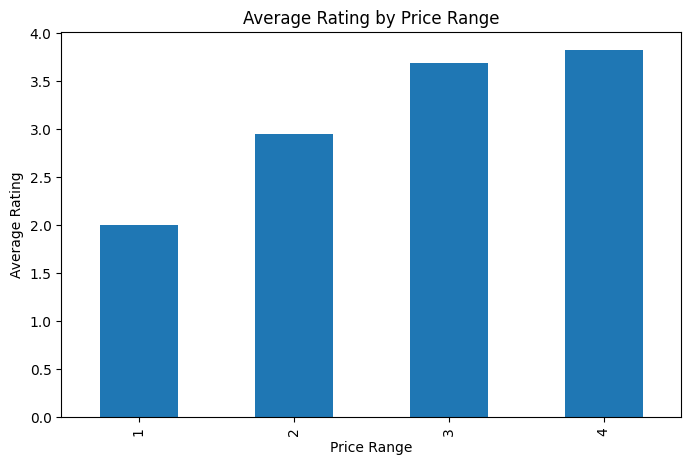

In [25]:
plt.figure(figsize=(8,5))
avg_rating_price.plot(kind='bar')
plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()


LEVEL 2 – TASK 3-- Feature Engineering

In [26]:
df['Restaurant_Name_Length'] = df['Restaurant Name'].apply(len)


In [27]:
df['Table_Booking'] = df['Has Table booking'].map({'Yes':1, 'No':0})
df['Online_Delivery'] = df['Has Online delivery'].map({'Yes':1, 'No':0})


In [28]:
df[['Restaurant_Name_Length', 'Table_Booking', 'Online_Delivery']].head()


,Restaurant_Name_Length,Table_Booking,Online_Delivery
0,16,1,0
1,16,1,0
2,22,1,0
3,4,0,0
4,11,1,0
